## Bangladeshi Paddy Trend Analysis in Coastal Areas

------------------------------------------------------------------------------------------

# Part 1 - Dataset Presentation

I have worked on Bangladeshi paddy trend analysis in coastal areas. The main purpose of this project is to analyze the influence of the weather conditions on paddy sowing time. 

For that, I have collected feature data on the weather of Bangladesh from Nasa Power View and label data from the Yearbook of Bangladesh Agriculture Statistics 2020 book.

In this real dataset, I have total 6 attributes (5 independent data - temperature, humidity, wind speed, precipitation and moisture, and one target value which is crops - aus, aman, and boro) and 1827 instances. Index is Date.

In [1]:
import os 
os.getcwd()

'C:\\Users\\Fatema Fahima\\Downloads\\anumpy\\CMSC6950'

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import iqr
warnings.filterwarnings('ignore')
import pandas_bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from bokeh.layouts import row
import pyswarms as ps
from CMSC import *
#from ipynb.fs.full.CMSC import *

Loading BokehJS ...

Loading BokehJS ...

In [3]:
import os 
os.getcwd()

'C:\\Users\\Fatema Fahima\\Downloads\\anumpy\\CMSC6950'

In [4]:
dataset = pd.read_csv("C:\\Users\\Fatema Fahima\\Downloads\\anumpy\\CMSC6950\\chittagong_weather.csv") #reading the dataset
Results = pd.DataFrame(columns = ['Model_variant', 'Accuracy'])

In [5]:
dataset

,YEAR,Date,Temperature,Humidity,Precipitation,Wind,Moisture,Crops
0,2016,1/1/2016,19.52,74.12,0.0,1.27,0.66,Boro
1,2016,1/2/2016,19.80,71.12,0.0,1.27,0.65,Boro
2,2016,1/3/2016,19.48,70.81,0.0,1.10,0.65,Boro
3,2016,1/4/2016,19.04,72.50,0.0,1.38,0.64,Boro
4,2016,1/5/2016,18.82,73.75,0.0,1.31,0.64,Boro
...,...,...,...,...,...,...,...,...
1822,2020,12/27/2020,17.48,80.00,0.0,1.74,0.80,Boro
1823,2020,12/28/2020,17.40,77.75,0.0,1.57,0.80,Boro
1824,2020,12/29/2020,17.05,79.88,0.0,1.81,0.80,Boro
1825,2020,12/30/2020,17.47,81.69,0.0,1.85,0.79,Boro


The input features of our dataset are Temperature, Humidity, Precipitation, Wind, and Moisture and the target value of my dataset is Crops (with 3 variations - Aus, Aman, and Boro). From the table above, you can see the dataset.

In [6]:
dataset['Crops'].unique()

array(['Boro', 'Aus', 'Aman'], dtype=object)

In [7]:
dataset.drop(['YEAR', 'Date'], axis = 1, inplace = True) #dropping the unncecessary columns

I have dropped the YEAR and Date columns from the dataset since these are not necessary further. 

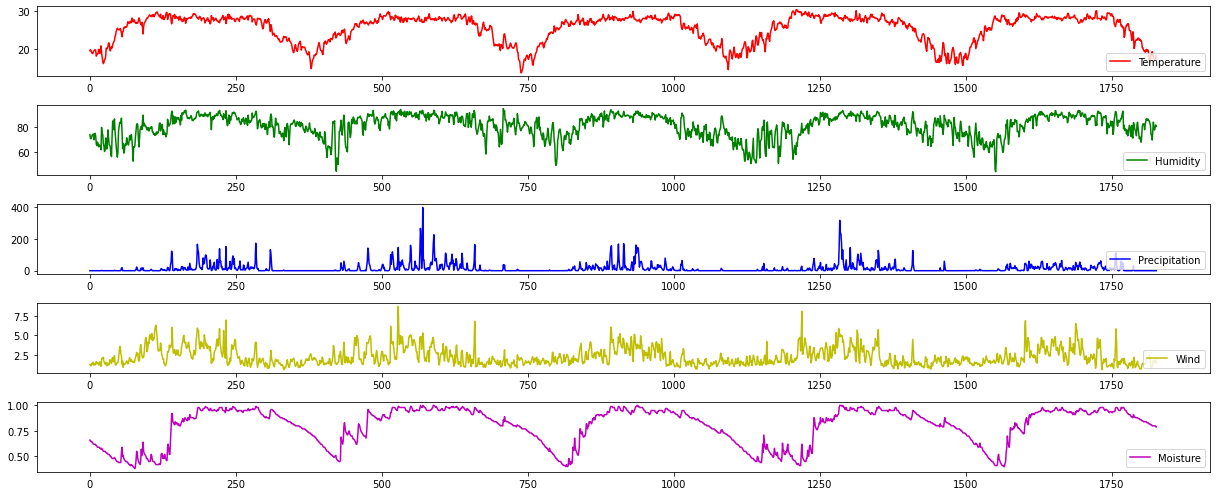

In [8]:
object1 = feature_plot(dataset.iloc[:,:-1])
object1.plot_features()

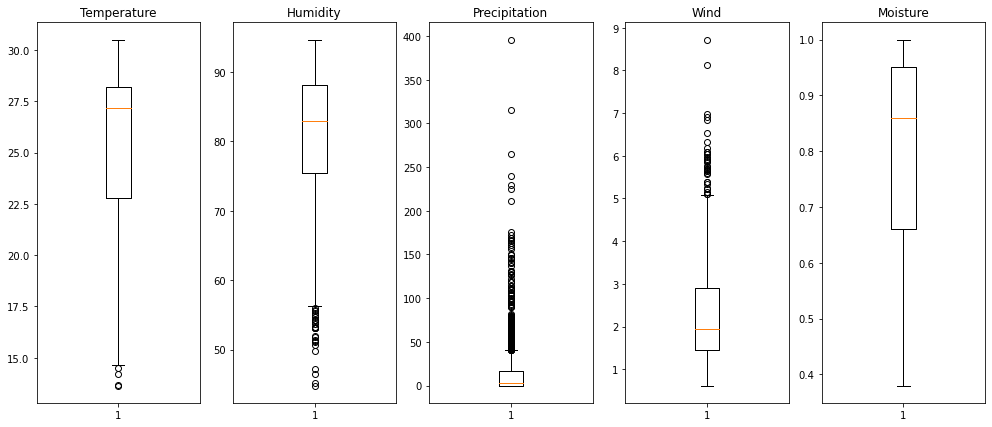

In [9]:
object2 = outlier_removing_with_plots(dataset)
object2.plot_bar_data(dataset.iloc[:,:-1])

You can see independent data in boxplot above with outliers

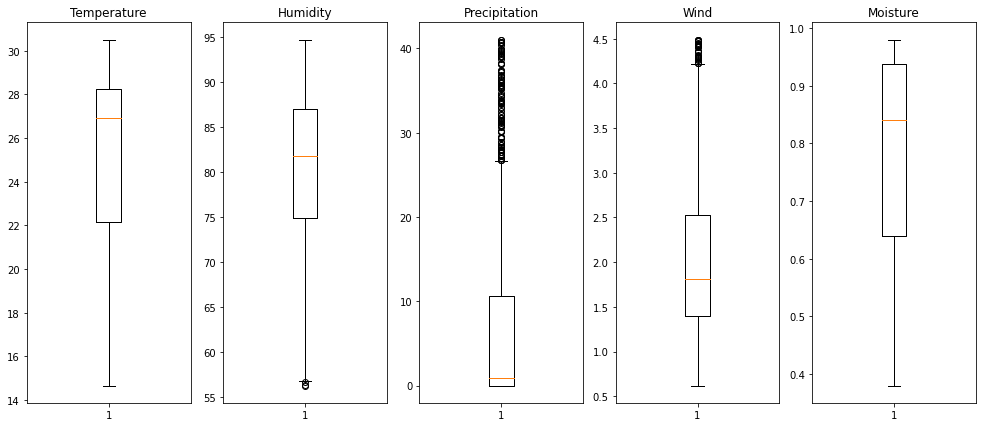

In [10]:
data_removing_outliers = object2.remove_outliers(dataset)
object2.plot_bar_data(data_removing_outliers.iloc[:,:-1])

I have removed the outliers from the independent data

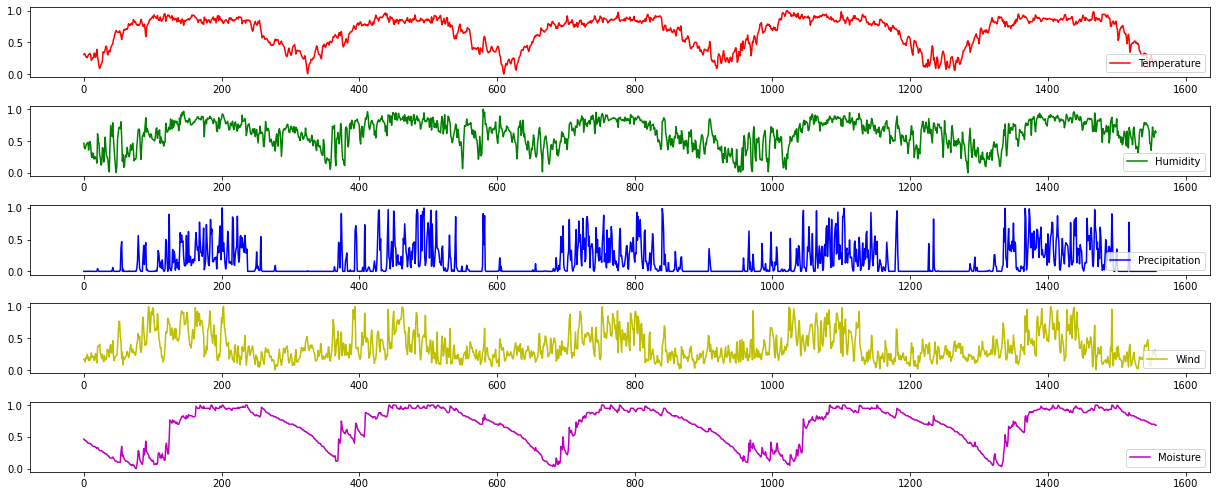

In [11]:
object3 = scale_data(data_removing_outliers.iloc[:,:-1])
dataset_minmax = object3.scaling_dataset('minmax')
dataset_std = object3.scaling_dataset('std')

object4 = feature_plot(dataset_minmax)
object4.plot_features()

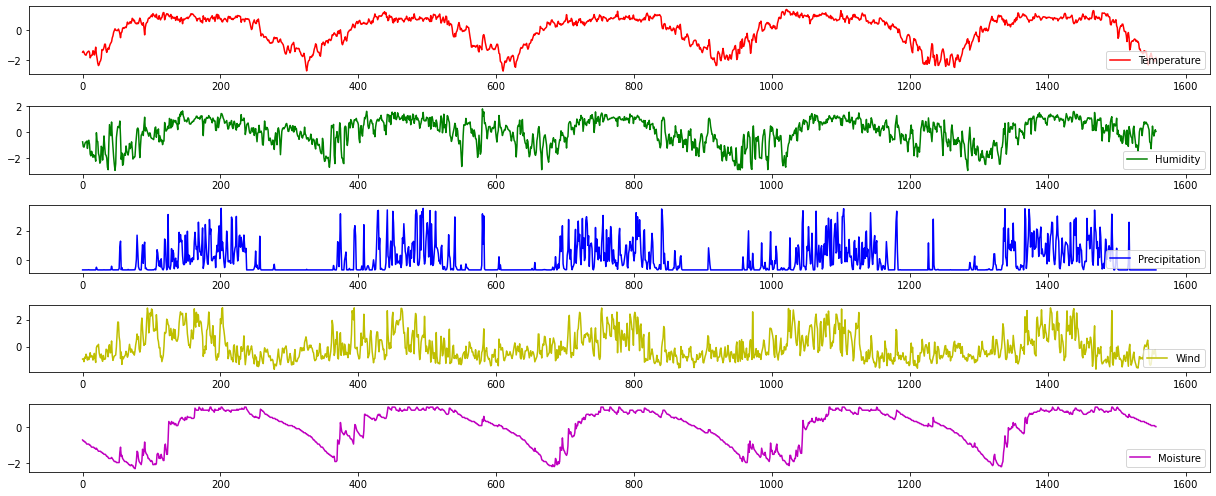

In [12]:
object5 = feature_plot(dataset_std)
object5.plot_features()

I have used to MinMax Scaler and Standard Scaler for data scaling 

In [13]:
object_base = model_run(dataset.iloc[:,:-1], dataset[['Crops']])

svc_accuracy_base = object_base.run_model('svc')
print(svc_accuracy_base)
Results = Results.append({'Model_variant':'Baseline_SVC', 'Accuracy':svc_accuracy_base}, ignore_index=True)
rf_accuracy_base = object_base.run_model('random_forest')
print(rf_accuracy_base)
Results = Results.append({'Model_variant':'Baseline_RF', 'Accuracy':rf_accuracy_base}, ignore_index=True)

85.14898819771939
93.14015520123762


In [14]:
object6 = model_run(dataset_minmax, data_removing_outliers[['Crops']])

svc_accuracy_minmax = object6.run_model('svc')
print(svc_accuracy_minmax)
Results = Results.append({'Model_variant':'MinMax_Scaled_SVC', 'Accuracy':svc_accuracy_minmax}, ignore_index=True)
rf_accuracy_minmax = object6.run_model('random_forest')
print(rf_accuracy_minmax)
Results = Results.append({'Model_variant':'MinMax_Scaled_rf', 'Accuracy':rf_accuracy_minmax}, ignore_index=True)

90.4575122983483
92.98252123010967


In [15]:
Results

,Model_variant,Accuracy
0,Baseline_SVC,85.148988
1,Baseline_RF,93.140155
2,MinMax_Scaled_SVC,90.457512
3,MinMax_Scaled_rf,92.982521


In [16]:
object7 = model_run(dataset_std, data_removing_outliers[['Crops']])
svc_accuracy_std = object7.run_model('svc')
print(svc_accuracy_std)
Results = Results.append({'Model_variant':'Standard_Scaled_SVC', 'Accuracy':svc_accuracy_std}, ignore_index=True)
rf_accuracy_std = object7.run_model('random_forest')
print(rf_accuracy_std)
Results = Results.append({'Model_variant':'Standard_Scaled_rf', 'Accuracy':rf_accuracy_std}, ignore_index=True)

91.399057355649
93.11086377002773


In [17]:
Results

,Model_variant,Accuracy
0,Baseline_SVC,85.148988
1,Baseline_RF,93.140155
2,MinMax_Scaled_SVC,90.457512
3,MinMax_Scaled_rf,92.982521
4,Standard_Scaled_SVC,91.399057
5,Standard_Scaled_rf,93.110864


In [18]:
reccursive_feature_elimination(dataset_std, data_removing_outliers[['Crops']],'svc', 3)

Recursive Feature Elimination with Support Vector Machine

Maximum number of features to be selected:  3
Name of the selected features: 
Temperature
Wind
Moisture


In [19]:
reccursive_feature_elimination(dataset_std, data_removing_outliers[['Crops']],'random_forest', 3)

Recursive Feature Elimination with Random Forest

Maximum number of features to be selected:  3
Name of the selected features: 
Temperature
Precipitation
Moisture


In [20]:
reccursive_feature_elimination(dataset_minmax, data_removing_outliers[['Crops']],'svc', 3)
reccursive_feature_elimination(dataset_minmax, data_removing_outliers[['Crops']],'random_forest', 3)

Recursive Feature Elimination with Support Vector Machine

Maximum number of features to be selected:  3
Name of the selected features: 
Temperature
Wind
Moisture
Recursive Feature Elimination with Random Forest

Maximum number of features to be selected:  3
Name of the selected features: 
Temperature
Precipitation
Moisture


In [21]:
object8 = model_run(dataset_minmax[['Temperature', 'Moisture']], data_removing_outliers[['Crops']])
svc_accuracy_minmax = object8.run_model('svc')
print(svc_accuracy_minmax)
Results = Results.append({'Model_variant':'RFE_Features_MinMax_Scaled_SVC', 'Accuracy':svc_accuracy_minmax}, ignore_index=True)
rf_accuracy_minmax = object8.run_model('random_forest')
print(rf_accuracy_minmax)
Results = Results.append({'Model_variant':'RFE_Features_MinMax_Scaled_RF', 'Accuracy':rf_accuracy_minmax}, ignore_index=True)

91.14333415780361
91.59170857723912


In [22]:
Results

,Model_variant,Accuracy
0,Baseline_SVC,85.148988
1,Baseline_RF,93.140155
2,MinMax_Scaled_SVC,90.457512
3,MinMax_Scaled_rf,92.982521
4,Standard_Scaled_SVC,91.399057
5,Standard_Scaled_rf,93.110864
6,RFE_Features_MinMax_Scaled_SVC,91.143334
7,RFE_Features_MinMax_Scaled_RF,91.591709


In [23]:
object9 = model_run(dataset_std[['Temperature', 'Moisture']], data_removing_outliers[['Crops']])
svc_accuracy_std = object9.run_model('svc')
print(svc_accuracy_std)
Results = Results.append({'Model_variant':'RFE_Features_Standard_Scaled_SVC', 'Accuracy':svc_accuracy_std}, ignore_index=True)
rf_accuracy_std = object9.run_model('random_forest')
print(rf_accuracy_std)
Results = Results.append({'Model_variant':'RFE_Features_Standard_Scaled_RF', 'Accuracy':rf_accuracy_std}, ignore_index=True)

91.14333415780361
91.67759089784812


In [24]:
Results

,Model_variant,Accuracy
0,Baseline_SVC,85.148988
1,Baseline_RF,93.140155
2,MinMax_Scaled_SVC,90.457512
3,MinMax_Scaled_rf,92.982521
4,Standard_Scaled_SVC,91.399057
5,Standard_Scaled_rf,93.110864
6,RFE_Features_MinMax_Scaled_SVC,91.143334
7,RFE_Features_MinMax_Scaled_RF,91.591709
8,RFE_Features_Standard_Scaled_SVC,91.143334
9,RFE_Features_Standard_Scaled_RF,91.677591


In [25]:
feature_importance(dataset_minmax, data_removing_outliers[['Crops']],'random_forest')
feature_importance(dataset_minmax, data_removing_outliers[['Crops']],'svc')

Feature Importance:  [0.44799573 0.11077914 0.16475891 0.05990908 0.21655714]


Feature Importance:  [4.19345375 0.2610906  0.2454249  0.19610219 3.96140087]


In [26]:
feature_importance(dataset_std, data_removing_outliers[['Crops']],'random_forest')
feature_importance(dataset_std
                   
                   
                   , data_removing_outliers[['Crops']],'svc')

Feature Importance:  [0.42079959 0.11394929 0.168689   0.05860627 0.23795585]


Feature Importance:  [1.89398425 0.06802246 0.07503183 0.05436511 1.4426615 ]


In [27]:
object10 = model_run(dataset_std[['Temperature','Precipitation', 'Moisture']], data_removing_outliers[['Crops']])
svc_accuracy_std = object10.run_model('svc')
Results = Results.append({'Model_variant':'FeatureImportance_Features_Standard_Scaled_SVC', 'Accuracy':svc_accuracy_std}, ignore_index=True)
print(svc_accuracy_std)
rf_accuracy_std = object10.run_model('random_forest')
print(rf_accuracy_std)
Results = Results.append({'Model_variant':'FeatureImportance_Features_Standard_Scaled_RF', 'Accuracy':rf_accuracy_std}, ignore_index=True)

91.05717701376864
91.8479814219364


In [28]:
Results

,Model_variant,Accuracy
0,Baseline_SVC,85.148988
1,Baseline_RF,93.140155
2,MinMax_Scaled_SVC,90.457512
3,MinMax_Scaled_rf,92.982521
4,Standard_Scaled_SVC,91.399057
5,Standard_Scaled_rf,93.110864
6,RFE_Features_MinMax_Scaled_SVC,91.143334
7,RFE_Features_MinMax_Scaled_RF,91.591709
8,RFE_Features_Standard_Scaled_SVC,91.143334
9,RFE_Features_Standard_Scaled_RF,91.677591


In [29]:
object11 = model_run(dataset_minmax[['Temperature','Precipitation', 'Moisture']], data_removing_outliers[['Crops']])
svc_accuracy_minmax = object11.run_model('svc')
print(svc_accuracy_minmax)
Results = Results.append({'Model_variant':'FeatureImportance_Features_MinMax_Scaled_SVC', 'Accuracy':svc_accuracy_minmax}, ignore_index=True)
rf_accuracy_minmax = object11.run_model('random_forest')
print(rf_accuracy_minmax)
Results = Results.append({'Model_variant':'FeatureImportance_Features_MinMax_Scaled_RF', 'Accuracy':rf_accuracy_minmax}, ignore_index=True)

90.05187292164784
92.34053370709319


In [30]:
Results

,Model_variant,Accuracy
0,Baseline_SVC,85.148988
1,Baseline_RF,93.140155
2,MinMax_Scaled_SVC,90.457512
3,MinMax_Scaled_rf,92.982521
4,Standard_Scaled_SVC,91.399057
5,Standard_Scaled_rf,93.110864
6,RFE_Features_MinMax_Scaled_SVC,91.143334
7,RFE_Features_MinMax_Scaled_RF,91.591709
8,RFE_Features_Standard_Scaled_SVC,91.143334
9,RFE_Features_Standard_Scaled_RF,91.677591


In [31]:
pso_rf_minmax_accuracy = PSO_Feature_selection_with_result(dataset_minmax, data_removing_outliers[['Crops']],'random_forest')
pso_svc_minmax_accuracy = PSO_Feature_selection_with_result(dataset_minmax, data_removing_outliers[['Crops']],'svc')
Results = Results.append({'Model_variant':'PSO_Features_MinMax_Scaled_RF', 'Accuracy':pso_rf_minmax_accuracy}, ignore_index=True)
Results = Results.append({'Model_variant':'PSO_Features_MinMax_Scaled_SVC', 'Accuracy':pso_svc_minmax_accuracy}, ignore_index=True)

2022-06-17 10:27:53,643 - pyswarms.discrete.binary - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 15, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|20/20, best_cost=0.0655
2022-06-17 10:35:11,851 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0654704977052244, best pos: [1 1 0 1 1]
2022-06-17 10:35:13,082 - pyswarms.discrete.binary - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 15, 'p': 2}


Selected Features by PSO:  ['Temperature' 'Humidity' 'Wind' 'Moisture']


pyswarms.discrete.binary: 100%|██████████|20/20, best_cost=0.0836
2022-06-17 10:36:55,462 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.08364663203891487, best pos: [1 1 0 1 1]


Selected Features by PSO:  ['Temperature' 'Humidity' 'Wind' 'Moisture']


In [28]:
Results

,Model_variant,Accuracy
0,Baseline_SVC,85.148988
1,Baseline_RF,93.377049
2,MinMax_Scaled_SVC,90.457512
3,MinMax_Scaled_rf,93.046761
4,Standard_Scaled_SVC,91.399057
5,Standard_Scaled_rf,93.046761
6,RFE_Features_MinMax_Scaled_SVC,91.143334
7,RFE_Features_MinMax_Scaled_RF,91.634650
8,RFE_Features_Standard_Scaled_SVC,91.143334
9,RFE_Features_Standard_Scaled_RF,91.656498


In [29]:
pso_rf_std_accuracy = PSO_Feature_selection_with_result(dataset_std, data_removing_outliers[['Crops']],'random_forest')
pso_svc_std_accuracy = PSO_Feature_selection_with_result(dataset_std, data_removing_outliers[['Crops']],'svc')
Results = Results.append({'Model_variant':'PSO_Features_Std_Scaled_RF', 'Accuracy':pso_rf_std_accuracy}, ignore_index=True)
Results = Results.append({'Model_variant':'PSO_Features_Std_Scaled_SVC', 'Accuracy':pso_svc_std_accuracy}, ignore_index=True)

2022-06-16 23:23:23,306 - pyswarms.discrete.binary - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 15, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|20/20, best_cost=0.0663
2022-06-16 23:24:39,293 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.06632176326710093, best pos: [1 1 0 1 1]
2022-06-16 23:24:39,553 - pyswarms.discrete.binary - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 15, 'p': 2}


Selected Features by PSO:  ['Temperature' 'Humidity' 'Wind' 'Moisture']


pyswarms.discrete.binary: 100%|██████████|20/20, best_cost=0.0817
2022-06-16 23:24:56,464 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.08172218099870832, best pos: [1 1 0 1 1]


Selected Features by PSO:  ['Temperature' 'Humidity' 'Wind' 'Moisture']


In [30]:
Results

,Model_variant,Accuracy
0,Baseline_SVC,85.148988
1,Baseline_RF,93.377049
2,MinMax_Scaled_SVC,90.457512
3,MinMax_Scaled_rf,93.046761
4,Standard_Scaled_SVC,91.399057
5,Standard_Scaled_rf,93.046761
6,RFE_Features_MinMax_Scaled_SVC,91.143334
7,RFE_Features_MinMax_Scaled_RF,91.634650
8,RFE_Features_Standard_Scaled_SVC,91.143334
9,RFE_Features_Standard_Scaled_RF,91.656498


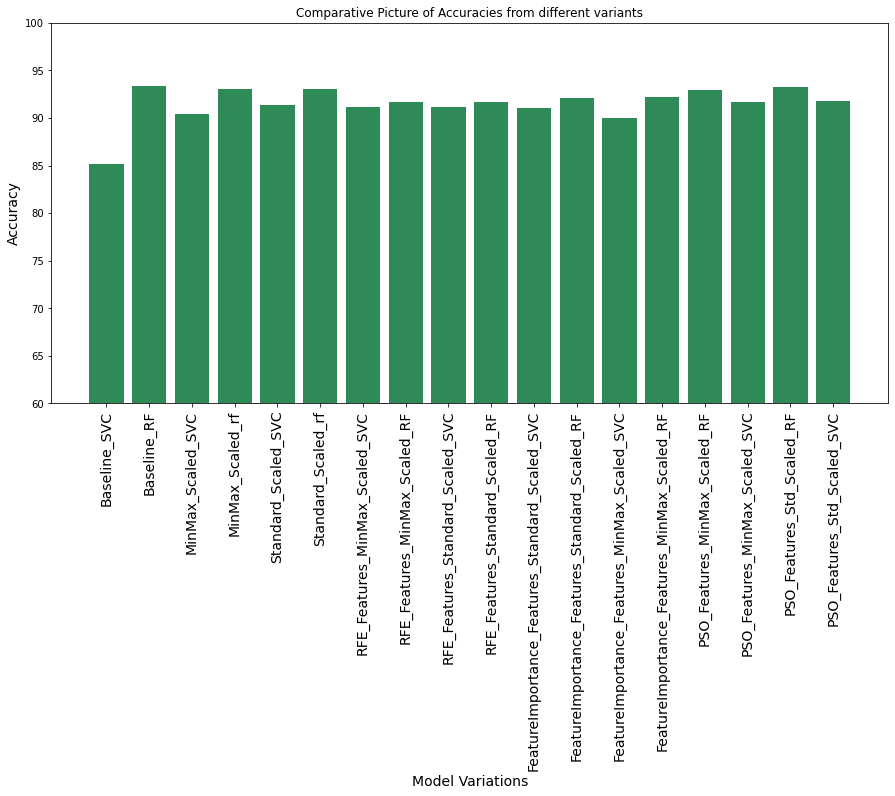

In [31]:
fig, axs = plt.subplots(figsize = (15,7))
axs.bar(Results['Model_variant'], Results['Accuracy'], color = 'seagreen')
axs.set_title('Comparative Picture of Accuracies from different variants')
axs.set_ylabel('Accuracy', fontsize = 14)
axs.set_xlabel('Model Variations', fontsize = 14)
axs.set_ylim(60,100)
plt.xticks(rotation=90, fontsize = 14)
plt.show()